In [2]:
import numpy as np
import pandas as pd
import time

In [165]:
intraday_price = [36.5,51.1,79.7,38.1,62.34,99]

In [134]:
data.head()

,dtm,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
0,2024-04-01 00:00:00,50.099,0.423174,-0.0,0.049412,0.0,0.022703,0.0
1,2024-04-01 00:00:01,50.089,0.372796,-0.0,0.043529,0.0,0.020000,0.0
2,2024-04-01 00:00:02,50.074,0.297229,-0.0,0.034706,0.0,0.015946,0.0
3,2024-04-01 00:00:03,50.062,0.236776,-0.0,0.027647,0.0,0.012703,0.0
4,2024-04-01 00:00:04,50.054,0.196474,-0.0,0.022941,0.0,0.010541,0.0


In [121]:
filtered_df.head()

,dtm,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
172800,2024-04-03 00:00:00,50.133,0.594458,-0.0,0.363500,0.0,0.031892,0.0
172801,2024-04-03 00:00:01,50.121,0.534005,-0.0,0.249500,0.0,0.028649,0.0
172802,2024-04-03 00:00:02,50.110,0.478589,-0.0,0.145000,0.0,0.025676,0.0
172803,2024-04-03 00:00:03,50.099,0.423174,-0.0,0.049412,0.0,0.022703,0.0
172804,2024-04-03 00:00:04,50.095,0.403023,-0.0,0.047059,0.0,0.021622,0.0


In [163]:
#resample the data into 4-hour windows with an offset of 3 hours
df_EAC_windows = data.resample('4h', on='dtm', offset='3h').mean()

In [230]:
# Create a DataFrame with the same index and the 'f' column copied directly
df_financial = df_EAC_windows[['f']].copy()

# Apply financial_value to each element of the DataFrame and assign to new columns
df_financial = df_financial.join(
    df_EAC_windows.iloc[:, 1:].apply(lambda col: col.index.to_series().map(lambda idx: financial_value(idx, col[idx], intraday_price)))
)

In [231]:
df_financial.head()

,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
dtm,,,,,,,
2024-03-31 23:00:00,49.989301,15.120855,33.189359,1.881839,6.599557,0.811213,1.185713
2024-04-01 03:00:00,50.015113,30.202560,29.086598,9.643498,3.043768,1.631591,0.937244
2024-04-01 07:00:00,49.971430,21.041425,89.197918,3.319674,21.285193,1.128844,3.295621
2024-04-01 11:00:00,50.002526,17.738093,26.661736,3.262397,4.051455,0.951625,0.921165
2024-04-01 15:00:00,49.960562,19.586677,87.136420,5.027792,22.325623,1.050799,3.312458


In [229]:
df_financial.head()

,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
dtm,,,,,,,
2024-03-31 23:00:00,49.989301,15.120855,33.189359,1.881839,6.599557,0.811213,1.185713
2024-04-01 03:00:00,50.015113,30.202560,29.086598,9.643498,3.043768,1.631591,0.937244
2024-04-01 07:00:00,49.971430,21.041425,89.197918,3.319674,21.285193,1.128844,3.295621
2024-04-01 11:00:00,50.002526,17.738093,26.661736,3.262397,4.051455,0.951625,0.921165
2024-04-01 15:00:00,49.960562,19.586677,87.136420,5.027792,22.325623,1.050799,3.312458


<Axes: >

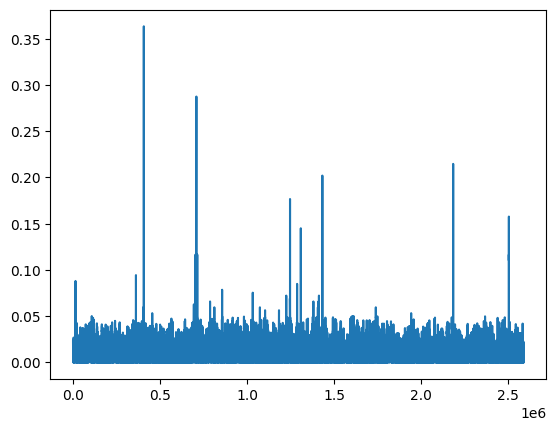

In [112]:
data['DC High %'].plot()

In [65]:
import pandas as pd 
import numpy as np
import time 
from configparser import ConfigParser
from utils.utils import Frequency, FrequencyProfile
from datetime import timedelta

class BiddingSim():
    def __init__(self, config: ConfigParser):
                
        self.__config_sim = config
        self.__start_date = pd.to_datetime(self.__config_sim['TIMEFRAME']['START_DATE'])-pd.Timedelta(hours=1)
        self.__end_date = pd.to_datetime(self.__config_sim['TIMEFRAME']['END_DATE'])
        self.__frequency_path = str(self.__config_sim['PROFILE']['FREQUENCY_PROFILE'])
    
    def run(self):
        #read frquency data
        frequency = FrequencyProfile(pd.read_csv(self.__frequency_path))
        frequency.add_response()
        frequency.aggregate_to_EAC_windows()

        intraday_price = [1,1,1,1,1,1]

        #cut to the timeframe under investigation but include the week before for usage prediction
        frequency = frequency.loc[(frequency.index >= self.__start_date - pd.Timedelta(weeks=1)) & (frequency.index <= self.__end_date)]
        
        frequency.add_EAC_window_identifier()

        #loop through the data and generate

        #check wether it starts with EAC window 1
        if frequency.loc[frequency.index >= self.__start_date].iloc[0]['EAC_window'] != 0:
            raise ValueError('Start date is not an EAC window 1.')
        #create an empty dataframe with the same indexes as the frequency data
        bids_df = pd.DataFrame(frequency.loc[frequency.index >= self.__start_date], columns=['Bid DR_high','Bid DR_low','Bid DM_high','Bid DM_low','Bid DC_high','Bid DC_low'])

        for index, row in frequency.loc[(frequency.index >= self.__start_date)].iterrows():
            bids = self.__generate_energy_cost(frequency,index,intraday_price) #+self.__generate_aging_cost(row)
            bids_df.loc[index] = bids

        return bids_df

    def __generate_energy_cost(self,frequency,index,intraday_price):
        bids = []
        EAC_window = int(frequency.loc[index]['EAC_window'])
        
        for column in frequency.columns[1:-1]:
            #generate expected energy usage by averaging over the last 7 days
            expected_usage = frequency.loc[(frequency['EAC_window'] == EAC_window) & (frequency.index >= index - pd.Timedelta(weeks=1))][column].mean()*4
            
            #generate the bid
            sign = 1 if 'low' in column else -1
            bid = expected_usage*intraday_price[EAC_window]*sign
            bids.append(bid)
        
        return bids
    
    def __generate_aging_cost(self,)
    
    #accepted_bids = self.__run_market(bids)
        


if __name__ == '__main__':
    config_sim = ConfigParser()
    config_sim.read('configs/optimization.optsim.ini')
    x = BiddingSim(config_sim)


In [71]:
import pandas as pd 
import numpy as np
import time 
from configparser import ConfigParser
from utils.utils import Frequency, FrequencyProfile
from datetime import timedelta

class BiddingSim():
    def __init__(self, config: ConfigParser):
                
        self.__config_sim = config
        self.__start_date = pd.to_datetime(self.__config_sim['TIMEFRAME']['START_DATE'])-pd.Timedelta(hours=1)
        self.__no_of_weeks = int(self.__config_sim['TIMEFRAME']['NO_OF_WEEKS'])
        self.__auction_data = pd.read_csv(str(self.__config_sim['PROFILE']['AUCTION_DATA']))
        self.__intraday_prices = pd.read_csv(str(self.__config_sim['PROFILE']['INTRADAY_PRICES']))
        self.__frequency_path = str(self.__config_sim['PROFILE']['FREQUENCY_PROFILE'])
    
    def run(self):
        #initialize global variables and read frequency data
        frequency = FrequencyProfile(pd.read_csv(self.__frequency_path))
        frequency.add_response()
        frequency.aggregate_to_EAC_windows()
        frequency.add_EAC_window_identifier()

        global_revenue = [0]
        global_energy_cost = [0]
        remaining_capacity = [1]

        for i in range(0,self.__no_of_weeks):
            
            start_of_week = self.__start_date + pd.Timedelta(weeks=i)
            #generate bids for the week based on past frequency data and expectations
            bids = self.__generate_bids_weekly(frequency,start_of_week)

            #add an identifier which bids were accepted based on real market data from the UK
            accepted_bids = self.__run_market(bids,self.__auction_data)

            #operate the battery for the week
            revenue, mean_soc, energy_cost, no_cycles = self.__operate_battery(bids,frequency,start_of_week,accepted_bids,self.__auction_data,self.__intraday_prices)

            #determine the actual incurred aging within that week
            capacity_fade = self.__run_aging_model(mean_soc,no_cycles)

            #update global variables
            global_revenue.append(revenue)
            global_energy_cost.append(energy_cost)
            remaining_capacity.append((1-capacity_fade)*remaining_capacity[-1])

        return global_revenue, global_energy_cost, remaining_capacity

    def __generate_bids_weekly(self,frequency: pd.DataFrame,start_of_week):
        
        bids_weekly = []

        for day in range(0,7):
            for EAC_window in range (0,6):
                #determine the cost (or revenue) associated with the expected energy usage for the 6 services
                energy_cost = np.array(self.__generate_energy_cost(frequency,start_of_week+pd.Timedelta(days=day),EAC_window))

                #determine the cost associated with the aging of the battery operating at the expected rate
                aging_cost = np.array(self.__generate_aging_cost(frequency,start_of_week+pd.Timedelta(days=day),EAC_window))

                #append the bid to the list through piecewise addition of the energy and aging cost
                bids_weekly.append(energy_cost + aging_cost)
                
        return bids_weekly
    
    def __generate_energy_cost(self,frequency,day,EAC_window):
       
        expected_energy_cost = []
        for column in frequency.columns[1:-1]:
            #extract the expected usage for said day by averaging over the same EAC window in the last week
            expected_usage = frequency.loc[(frequency.index <= day) & (frequency['EAC_window'] == EAC_window) & (frequency.index >= day - pd.Timedelta(weeks=1))][column].mean()*4
            
            #determine the expected price per energy unit in the timeframe under investigation
            expected_price = 13.5 #TODO: implement a function to determine the expected price

            #generate the bid
            sign = 1 if 'low' in column else -1
            bid = expected_usage*expected_price*sign
            
            expected_energy_cost.append(bid)
        
        return expected_energy_cost
    

    def __generate_aging_cost(self,frequency,day,EAC_window):
        
        expected_aging_cost = []

        for column in frequency.columns[1:-1]:
            #extract the expected usage for said day by averaging over the same EAC window in the last week
            expected_cycles = frequency.loc[(frequency.index <= day) & (frequency['EAC_window'] == EAC_window) & (frequency.index >= day - pd.Timedelta(weeks=1))][column].mean()*4
            
            #determine the expected price per energy unit in the timeframe under investigation
            aging_price =  expected_cycles * 13.9 #TODO: implement a better way of determining the aging price

            expected_aging_cost.append(aging_price)

        return expected_aging_cost  
    
    def __run_market(self,bids,auction_data):
        
        accepted_bids = []

        for day in range(0,7):
            for EAC_window in range (0,6):
                accepted_bids.append(1) #for now assume all bids are accepted
        
        return accepted_bids
    
    def __operate_battery(self,frequency,start_of_week,bids,accepted,auction_data,intraday_prices):
        revenue = 0
        soc = []
        energy_cost = 0
        no_cycles = 0
        clearing_price = auction_data['clearingPrice']
        
        #cycle through all EAC_windows in the week and go through actual operation
        for day in range(0,7):
            for EAC_window in range (0,6):
                #determine the monetary revenue of that window
                if accepted[day*6+EAC_window] == 1:
                    revenue += clearing_price[day*6+EAC_window] #assuming the clearing price is ordered the same way as the bids

                    #determine the actual energy cost of that window
                    energy_cost += 1
                    soc.append(0.5)
                    no_cycles += 0.5
        
        mean_soc = np.mean(soc)

        return revenue, mean_soc, energy_cost, no_cycles

    def __run_aging_model(self,mean_soc,no_cycles):
        
        return 0.001



if __name__ == '__main__':
    config_sim = ConfigParser()
    config_sim.read('configs/optimization.optsim.ini')
    x = BiddingSim(config_sim)

In [72]:
config_sim = ConfigParser()
config_sim.read('configs/optimization.optsim.ini')
x = BiddingSim(config_sim)

In [73]:
global_revenue, global_energy_cost, remaining_capacity = x.run()

The data was resampled with a fixed offset of 3h. This means the first window starts on 2024-03-31 23:00:00 and the last window starts on 2024-04-30 23:00:00


In [74]:
print(global_revenue, global_energy_cost, remaining_capacity)

[0, 81.57000000000001, 81.57000000000001, 81.57000000000001] [0, 42, 42, 42] [1, 0.999, 0.998001, 0.997002999]


In [61]:
auction_data = pd.read_csv('Data/Frequency/FFR_clearing_price_23-24.csv')

In [91]:
auction_data.head(40)

,auctionID,auctionProduct,serviceType,deliveryStart,deliveryEnd,clearedVolume,clearingPrice,date
0,1,DRH,Response,2023-11-02 23:00:00,2023-11-03T03:00:00,175.0,2.75,2023-11-02
1,1,DRH,Response,2023-11-03 03:00:00,2023-11-03T07:00:00,239.0,4.04,2023-11-03
2,1,DRH,Response,2023-11-03 07:00:00,2023-11-03T11:00:00,290.0,-3.30,2023-11-03
3,1,DRH,Response,2023-11-03 11:00:00,2023-11-03T15:00:00,290.0,-3.53,2023-11-03
4,1,DRH,Response,2023-11-03 15:00:00,2023-11-03T19:00:00,290.0,-5.81,2023-11-03
5,1,DRH,Response,2023-11-03 19:00:00,2023-11-03T23:00:00,290.0,-4.50,2023-11-03
6,1,DML,Response,2023-11-02 23:00:00,2023-11-03T03:00:00,150.0,2.07,2023-11-02
7,1,DML,Response,2023-11-03 03:00:00,2023-11-03T07:00:00,150.0,2.12,2023-11-03
8,1,DML,Response,2023-11-03 07:00:00,2023-11-03T11:00:00,150.0,5.77,2023-11-03
9,1,DML,Response,2023-11-03 11:00:00,2023-11-03T15:00:00,150.0,4.02,2023-11-03


In [92]:
auction_data['deliveryStart'] = pd.to_datetime(auction_data['deliveryStart'])
pivot_df = auction_data.pivot_table(
    index='deliveryStart',
    columns='auctionProduct',
    values='clearingPrice',
    aggfunc='last'  # Use 'first' to get the first occurrence if there are duplicates
)

In [95]:
auction_data.pivot_table(
    index='deliveryStart',
    columns='auctionProduct',
    values='clearingPrice',
    aggfunc='last'  # Use 'first' to get the first occurrence if there are duplicates
)

auctionProduct,DCH,DCL,DMH,DML,DRH,DRL
deliveryStart,,,,,,
2023-11-02 23:00:00,3.86,0.26,5.37,2.07,2.75,3.33
2023-11-03 03:00:00,5.64,0.20,7.00,2.12,4.04,5.79
2023-11-03 07:00:00,1.78,2.28,0.15,5.77,-3.30,13.30
2023-11-03 11:00:00,2.30,1.36,1.75,4.02,-3.53,9.53
2023-11-03 15:00:00,1.96,3.25,-0.23,8.23,-5.81,15.60
...,...,...,...,...,...,...
2024-06-10 02:00:00,6.00,1.80,1.13,4.43,-0.43,7.00
2024-06-10 06:00:00,1.29,3.23,-0.79,6.45,-7.51,7.30
2024-06-10 10:00:00,2.82,1.75,0.39,4.59,-2.79,6.85


In [94]:
pivot_df.head(8)

auctionProduct,DCH,DCL,DMH,DML,DRH,DRL
deliveryStart,,,,,,
2023-11-02 23:00:00,3.86,0.26,5.37,2.07,2.75,3.33
2023-11-03 03:00:00,5.64,0.20,7.00,2.12,4.04,5.79
2023-11-03 07:00:00,1.78,2.28,0.15,5.77,-3.30,13.30
2023-11-03 11:00:00,2.30,1.36,1.75,4.02,-3.53,9.53
2023-11-03 15:00:00,1.96,3.25,-0.23,8.23,-5.81,15.60
2023-11-03 19:00:00,1.86,1.39,-0.86,5.95,-4.50,12.81
2023-11-03 23:00:00,2.15,0.75,1.17,2.15,-7.84,11.42
2023-11-04 03:00:00,3.29,0.07,2.30,2.45,-4.09,9.48


In [144]:
class AuctionData(pd.DataFrame):
    
    def __init__(self, data):
        super().__init__(data)

    def rearrange(self):
        self['deliveryStart'] = pd.to_datetime(self['deliveryStart'])
        # Create a pivot table
        pivot_df = self.pivot_table(
            index='deliveryStart',
            columns='auctionProduct',
            values='clearingPrice',
            aggfunc='last'  # Use 'last' to get the last occurrence if there are duplicates
        )
        # Reset the index to make 'deliveryStart' a column again
        pivot_df.reset_index(inplace=True)
        # Update the original DataFrame in place
        self.drop(self.index, inplace=True)
        self.columns = pivot_df.columns
        for col in pivot_df.columns:
            self[col] = pivot_df[col]
        self.index = pivot_df.index
        
        #rename the columns according to dict
        col_dict = {
            'deliveryStart': 'dtm',
            'DRH': 'DR_High',
            'DRL': 'DR_Low',
            'DMH': 'DM_High',
            'DML': 'DM_Low',
            'DCH': 'DC_High',
            'DCL': 'DC_Low'
        }
        self.rename(columns=col_dict, inplace=True)

In [145]:
auction_data = AuctionData(pd.read_csv('Data/Frequency/FFR_clearing_price_23-24.csv'))

In [146]:
auction_data.head()

,auctionID,auctionProduct,serviceType,deliveryStart,deliveryEnd,clearedVolume,clearingPrice
0,1,DRH,Response,2023-11-02T23:00:00,2023-11-03T03:00:00,175.0,2.75
1,1,DRH,Response,2023-11-03T03:00:00,2023-11-03T07:00:00,239.0,4.04
2,1,DRH,Response,2023-11-03T07:00:00,2023-11-03T11:00:00,290.0,-3.30
3,1,DRH,Response,2023-11-03T11:00:00,2023-11-03T15:00:00,290.0,-3.53
4,1,DRH,Response,2023-11-03T15:00:00,2023-11-03T19:00:00,290.0,-5.81


In [147]:
auction_data.rearrange()

In [148]:
auction_data.head(30)

auctionProduct,dtm,DC_High,DC_Low,DM_High,DM_Low,DR_High,DR_Low
0,2023-11-02 23:00:00,3.86,0.26,5.37,2.07,2.75,3.33
1,2023-11-03 03:00:00,5.64,0.20,7.00,2.12,4.04,5.79
2,2023-11-03 07:00:00,1.78,2.28,0.15,5.77,-3.30,13.30
3,2023-11-03 11:00:00,2.30,1.36,1.75,4.02,-3.53,9.53
4,2023-11-03 15:00:00,1.96,3.25,-0.23,8.23,-5.81,15.60
5,2023-11-03 19:00:00,1.86,1.39,-0.86,5.95,-4.50,12.81
6,2023-11-03 23:00:00,2.15,0.75,1.17,2.15,-7.84,11.42
7,2023-11-04 03:00:00,3.29,0.07,2.30,2.45,-4.09,9.48
8,2023-11-04 07:00:00,1.89,1.05,1.07,2.95,-5.85,10.76
9,2023-11-04 11:00:00,2.86,0.28,0.00,4.00,-4.98,10.30


In [3]:
from utils.utils import FrequencyProfile
import pandas as pd

profile_df = pd.read_csv('Data/Frequency/fnew-2024-4.csv')
profile = FrequencyProfile(profile_df)

In [4]:
profile.add_response()

In [5]:
profile.head()

,dtm,f,DM_high,DM_low,DC_high,DC_low,DR_high,DR_low
0,2024-04-01 00:00:00,50.099,0.049412,0.0,0.022703,0.0,0.423174,0.0
1,2024-04-01 00:00:01,50.089,0.043529,0.0,0.020000,0.0,0.372796,0.0
2,2024-04-01 00:00:02,50.074,0.034706,0.0,0.015946,0.0,0.297229,0.0
3,2024-04-01 00:00:03,50.062,0.027647,0.0,0.012703,0.0,0.236776,0.0
4,2024-04-01 00:00:04,50.054,0.022941,0.0,0.010541,0.0,0.196474,0.0


In [6]:
profile.aggregate_to_EAC_windows()

The data was resampled with a fixed offset of 3h. This means the first window starts on 2024-03-31 23:00:00 and the last window starts on 2024-04-30 23:00:00


In [9]:
profile.add_EAC_window_identifier()

In [10]:
profile.head()

,f,DM_high,DM_low,DC_high,DC_low,DR_high,DR_low,EAC_window
dtm,,,,,,,,
2024-03-31 23:00:00,49.989301,0.012889,0.045202,0.005556,0.008121,0.103567,0.227324,0
2024-04-01 03:00:00,50.015113,0.047180,0.014891,0.007982,0.004585,0.147762,0.142302,1
2024-04-01 07:00:00,49.971430,0.010413,0.066767,0.003541,0.010338,0.066002,0.279793,2
2024-04-01 11:00:00,50.002526,0.021407,0.026584,0.006244,0.006044,0.116392,0.174946,3
2024-04-01 15:00:00,49.960562,0.020163,0.089532,0.004214,0.013284,0.078548,0.349440,4


In [50]:
profile_df = pd.read_csv('Data/Frequency/fnew-2024-4.csv')
profile = FrequencyProfile(profile_df)
profile.add_response()

In [51]:
profile = FrequencyProfile(profile_df)
profile.add_response()

In [52]:
profile.aggregate_to_EAC_windows()

The data was resampled with a fixed offset of 3h. This means the first window starts on 2024-03-31 23:00:00 and the last window starts on 2024-04-30 23:00:00


In [53]:
profile.head()

,f,DM_high,DM_low,DC_high,DC_low,DR_high,DR_low
dtm,,,,,,,
2024-03-31 23:00:00,49.989301,0.012889,0.045202,0.005556,0.008121,0.103567,0.227324
2024-04-01 03:00:00,50.015113,0.047180,0.014891,0.007982,0.004585,0.147762,0.142302
2024-04-01 07:00:00,49.971430,0.010413,0.066767,0.003541,0.010338,0.066002,0.279793
2024-04-01 11:00:00,50.002526,0.021407,0.026584,0.006244,0.006044,0.116392,0.174946
2024-04-01 15:00:00,49.960562,0.020163,0.089532,0.004214,0.013284,0.078548,0.349440
